# FPE - Advection-diffusion equation

In this notebook, we go over the combination of both the advection and diffusion components of the Fokker-Planck equation together and benchmark the results against the expected physical quantities in a harmonic trap

From a mathematical point of view, we are now solving the equation

$$ \partial_t p(x, t) = -\beta D \partial_x [F(x, t) p(x, t)] + D\partial_{x}^2 p(x, t) $$

where $F(x, t)$ is the (generally) time- and space-dependant force. In this notebook, instead of the constant force scenario (arising from a linear potential energy function) we look at a (time-independent) harmonic confining potential of the form

$$ E(x) = \frac{k}{2}(x - \lambda)^2 $$

In this case, the equilibrium distribution is given by 

$$ \pi(x | \lambda) \propto e^{-\beta E(x)} $$

and is therefore a Gaussian, with mean $\lambda$ and variance $1 / \beta k$.

Furthermore, in this scenario, if the initial state is a Gaussian distribution, then under the time-dependant dynamics, the distribution will stay Gaussian. Quantitatively, the mean will evolve as

$$ \langle x \rangle = \lambda - \langle x_0\rangle e^{-\beta D t} $$

Furthermore, for this system, when the minimum of the harmonic potential is translated at a constant velocity, the work and power supplied are known exactly. For a system that begins at equilibrium with the stationary harmonic potential, if the position of the base $\lambda$ then begins translating forward at a velocity of $\dot{\lambda}$, the excess work and excess power are given by

$$ \langle W \rangle =  $$

$$ \langle P \rangle = $$

In this notebook, we will show how the combined advection and diffusion logic combine to realistically replicate these desired physical properties.

#### References
[1] O. Mazonka & C. Jarzynski, "Exactly solvable model illustrating far-from-equilibrium predictions", *ArXiV*, **1999** 


In [30]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
sns.set(style="darkgrid", palette="hls")

from FPE.Integrator import FPE_Integrator_1D
import FPE.forceFunctions as ff

# Dynamics parameters
D = 1.0
dt = 0.00025
dx = 0.01
x_array = np.arange(-2, 1, dx)

# To start, initialize an integrator object
fpe = FPE_Integrator_1D(D, dt, dx, x_array, boundaryCond="hard-wall")




Initializing diffusion term integration matrix...

		Using Crank-Nicolson integration scheme...
		Initializing integration matrices for diffusion



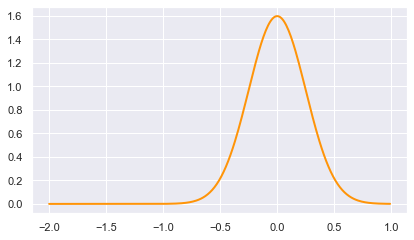

In [31]:
k_trap = 16
init_var = 1 / k_trap
fpe.initializeProbability(0, init_var)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.5))
ax.plot(fpe.xArray, fpe.prob, linewidth=2.0, color=sns.xkcd_rgb["tangerine"])
plt.tight_layout()
plt.show()


In [32]:
fpe.check_CFL(([k_trap, 0]), ff.harmonicForce)

		CFL criterion satisfied, CFL --> 0.8




True

In [40]:
# Now we can initialize the probability to the right of the trap minimum, and
# observe the relaxatiojn of probability towards the equilibrtium state
fpe.initializeProbability(-1, init_var)

t_tot = 1.0
curr_time = 0
counter = 0
prob_tracker = []


while curr_time < t_tot:
    if counter % 10 == 0:
        print(f"Time = {curr_time}..")
        prob_tracker.append(fpe.prob.copy())
    fpe.integrate_step(([k_trap*2, 0]), ff.harmonicForce)
    counter += 1
    curr_time += fpe.dt

Time = 0..
Time = 0.0025000000000000005..
Time = 0.005000000000000003..
Time = 0.007500000000000005..
Time = 0.010000000000000007..
Time = 0.01250000000000001..
Time = 0.015000000000000012..
Time = 0.017500000000000012..
Time = 0.020000000000000014..
Time = 0.022500000000000017..
Time = 0.02500000000000002..
Time = 0.02750000000000002..
Time = 0.030000000000000023..
Time = 0.03250000000000002..
Time = 0.035000000000000024..
Time = 0.037500000000000026..
Time = 0.04000000000000003..
Time = 0.04250000000000003..
Time = 0.04500000000000003..
Time = 0.047500000000000035..
Time = 0.05000000000000004..
Time = 0.05250000000000004..
Time = 0.05500000000000004..
Time = 0.057500000000000044..
Time = 0.060000000000000046..
Time = 0.06250000000000004..
Time = 0.06500000000000004..
Time = 0.06750000000000005..
Time = 0.07000000000000005..
Time = 0.07250000000000005..
Time = 0.07500000000000005..
Time = 0.07750000000000005..
Time = 0.08000000000000006..
Time = 0.08250000000000006..
Time = 0.08500000

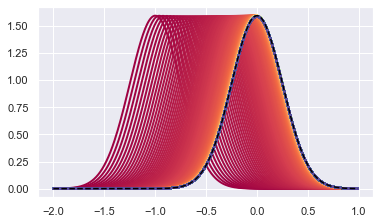

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3.5))
Pal = sns.color_palette("Spectral", len(prob_tracker))
for i, prob in enumerate(prob_tracker):
    ax.plot(fpe.xArray, prob, color=Pal[i], linewidth=2.0)

eq_dist = np.exp(-ff.harmonicEnergy(fpe.xArray, (k_trap, 0)))
eq_dist = eq_dist / (np.sum(eq_dist) * fpe.dx)
ax.plot(fpe.xArray, eq_dist, 'k--')
